In [103]:
#Brug beatuful soup til at finde hvor mange jobs der matcher din søgning

import bs4
import requests
html = requests.get('https://www.jobindex.dk/jobsoegning?q=Datamatiker')
txt = html.text
soup = bs4.BeautifulSoup(txt, 'html.parser')
#print(soup)
mydivs = soup.findAll("div", {"class": "jobsearch-result"})
print(type(mydivs))

result = []
for item in mydivs:
    result.extend(item.findAll("b"))

for res in result:
    print (res.getText())
    
print('Total: ' + str(len(result)))

<class 'bs4.element.ResultSet'>
It-teknisk projektleder
Special Minds
IT-sikkerhedsansvarlig
Arbejdernes Landsbank
IT-forretningskonsulent med erfaring i ServiceNow
Energinet
Vil du kickstarte din karriere som Data Engineer i Skatteforvaltningen?
Udviklings- og Forenklingsstyrelsen
Erfarne Data Engineers
Udviklings- og Forenklingsstyrelsen
Data & Trending Specialist - vikariat
ConvaTec, Infusion Care
Professionel og innovativ backupspecialist til en af Danmarks største it-installationer
Region Hovedstaden
Lead udvikler til it-projekter hos CGI’s store offentlige kunder
CGI Danmark A/S
Erfaren Java-udvikler til store it-projekter hos CGI’s offentlige kunder
CGI Danmark A/S
Erfaren, tilpasningsdygtig og vedholdende NAV-udvikler
Lomax A/S
Erfaren systemudvikler til IT-virksomhed i Aarhus
Panorama Consult
.Net udvikler søges til Microsoft team
GF Forsikring
Vi vækster og søger lige nu mange nye medarbejdere-også til vores It-udviklingsafdeling. Er du interesseret i medlemsoplevelsen, og er

In [15]:
#Check hvor mange job der er tilbudt i de forskellige områder i landet

import bs4
import requests
import re
import regex

html = requests.get('https://www.jobindex.dk/jobsoegning?q=Datamatiker')
txt = html.text
soup = bs4.BeautifulSoup(txt, 'html.parser')

#print(soup)

areas = []
div_areas = soup.findAll("div", {"id": "areas"})

for area in div_areas:
    cities = area.findAll("a", {"class" : "area_label" })
    #print(cities)
    for city in cities:
        stripped_city = city.getText().strip()
        _city = regex.findall(r'[A-Za-zæøå]+|\d+', str(stripped_city), re.UNICODE)
        
        if len(_city) == 2:
            _area = {
            _city[0]: _city[1]
        }
        else:
            _area = {
            _city[0] + _city[1] : _city[2] 
        }
        areas.append(_area)
     
    
print(areas)

[{'Storkøbenhavn': '15'}, {'Nordsjælland': '5'}, {'RegionSjælland': '2'}, {'Fyn': '5'}, {'RegionNordjylland': '7'}, {'RegionMidtjylland': '12'}, {'Sydjylland': '4'}, {'Bornholm': '0'}, {'Skåne': '0'}, {'Grønland': '0'}, {'Færøerne': '0'}, {'Udlandet': '1'}, {'Danmark': '45'}]


,Region,Number of Jobs
12,Danmark,176
0,Storkøbenhavn,109
5,RegionMidtjylland,29
1,Nordsjælland,24
3,Fyn,12
6,Sydjylland,10
4,RegionNordjylland,8
8,Skåne,6
2,RegionSjælland,5
11,Udlandet,5


<AxesSubplot:title={'center':'Python Jobs'}, xlabel='Region'>

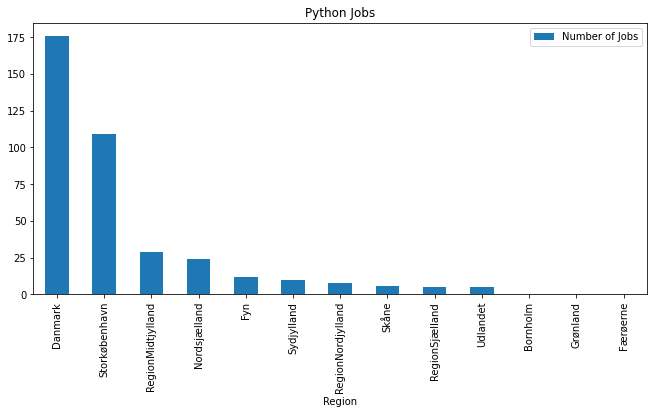

In [55]:
#I feltet søg efter job, søg på henholdsvis Python, Java og Javascript.
#- URLen skal gerne se sådan ud https://www.jobindex.dk/jobsoegning?q=python    
#Gør som før, find ud af hvor mange job der er, hvor i landet jobbene er tilbudt,
#og til sidst lav så en graf (i vælger selv hvad der giver mest mening),
#for hvor vi har bedst mulighed for at finde job. 

import bs4
import requests
import re
import regex
import pandas as pd
import matplotlib.pyplot as plt

def get_region_info(url):

    html = requests.get(url)
    txt = html.text
    soup = bs4.BeautifulSoup(txt, 'html.parser')

    areas = {}
    div_areas = soup.findAll("div", {"id": "areas"})

    for area in div_areas:
        cities = area.findAll("a", {"class" : "area_label" })
    
        for city in cities:
            stripped_city = city.getText().strip()
            _city = regex.findall(r'[A-Za-zæøå]+|\d+', str(stripped_city), re.UNICODE)
        
            if len(_city) == 2:
                _area = {
                _city[0]: int(_city[1])
            }
            else:
                _area = {
                _city[0] + _city[1] : int(_city[2]) 
            }
            areas.update(_area)
            
    return areas
     

    
python_data = get_region_info('https://www.jobindex.dk/jobsoegning?q=Python')
js_data = get_region_info('https://www.jobindex.dk/jobsoegning?q=JavaScript')
java_data = get_region_info('https://www.jobindex.dk/jobsoegning?q=Java')
ruby_data = get_region_info('https://www.jobindex.dk/jobsoegning?q=Ruby')
#Python Data

d_python = {'Region' : python_data.keys(), 'Number of Jobs' : python_data.values()}

python_df = pd.DataFrame(d_python).sort_values('Number of Jobs', ascending=False)

display(python_df)
python_df.plot(kind="bar", x='Region', y='Number of Jobs', figsize=(11,5), title='Python Jobs')



,Region,Number of Jobs
12,Danmark,134
8,Skåne,126
0,Storkøbenhavn,76
5,RegionMidtjylland,19
4,RegionNordjylland,12
6,Sydjylland,12
1,Nordsjælland,10
3,Fyn,9
2,RegionSjælland,3
11,Udlandet,3


<AxesSubplot:title={'center':'JS Jobs'}, xlabel='Region'>

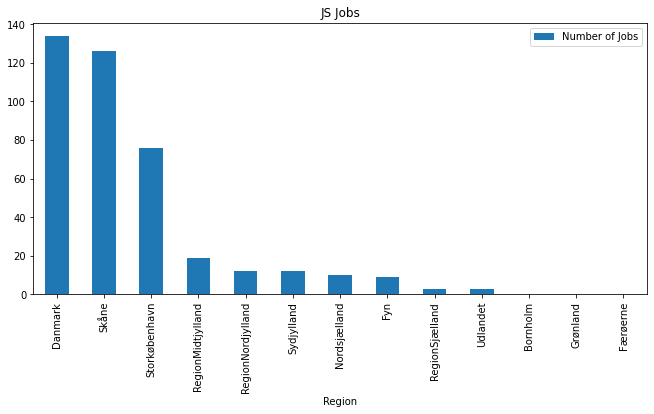

In [56]:
#JS Data

d_js = {'Region' : js_data.keys(), 'Number of Jobs' : js_data.values()}

js_df = pd.DataFrame(d_js).sort_values('Number of Jobs', ascending=False)

display(js_df)
js_df.plot(kind="bar", x='Region', y='Number of Jobs', figsize=(11,5), title='JS Jobs')



,Region,Number of Jobs
12,Danmark,107
0,Storkøbenhavn,59
5,RegionMidtjylland,19
1,Nordsjælland,9
4,RegionNordjylland,8
6,Sydjylland,6
8,Skåne,6
2,RegionSjælland,5
3,Fyn,5
11,Udlandet,3


<AxesSubplot:title={'center':'Java Jobs'}, xlabel='Region'>

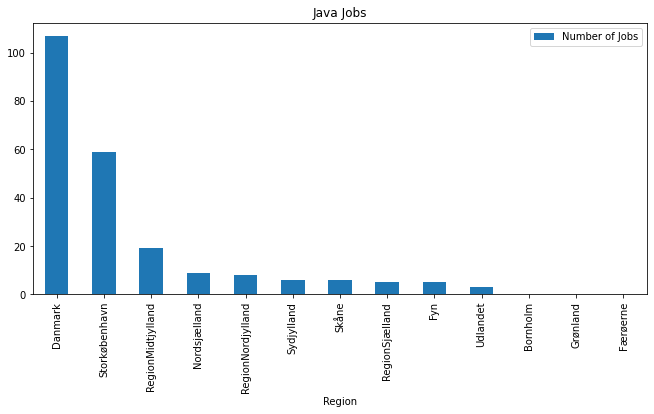

In [57]:
#Java Data

d_java = {'Region' : java_data.keys(), 'Number of Jobs' : java_data.values()}

java_df = pd.DataFrame(d_java).sort_values('Number of Jobs', ascending=False)

display(java_df)
java_df.plot(kind="bar", x='Region', y='Number of Jobs', figsize=(11,5), title='Java Jobs')

In [ ]:
#Ruby

d_java = {'Region' : java_data.keys(), 'Number of Jobs' : java_data.values()}

java_df = pd.DataFrame(d_java).sort_values('Number of Jobs', ascending=False)

display(java_df)
java_df.plot(kind="bar", x='Region', y='Number of Jobs', figsize=(11,5), title='Java Jobs')